<a href="https://colab.research.google.com/github/acmoral/ProyectoMineria/blob/master/weather_data_analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#Our dataset in Google drive
%cd drive/Shareddrives/Minería\ de\ datos\ 2023/

In [69]:
data = pd.read_csv('../data/weatherAUS.csv')

Global varaiables

In [40]:
theme = '#16A085'

La idea seria en cada sección añadir una descripción de manera que se analisen los datos que se obtengan.

# Estadistica uni variada

## 1. visualizar el dataset


In [128]:
names = data.keys()
print(names)

numericNames = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [5]:
data.shape

(145460, 23)

In [99]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [100]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [80]:
# pd.plotting.scatter_matrix(data,figsize=(100,100))

## 2. ver frecuencia de valores de atributos categoricos y/o

2.a Frecuencias para cada estación

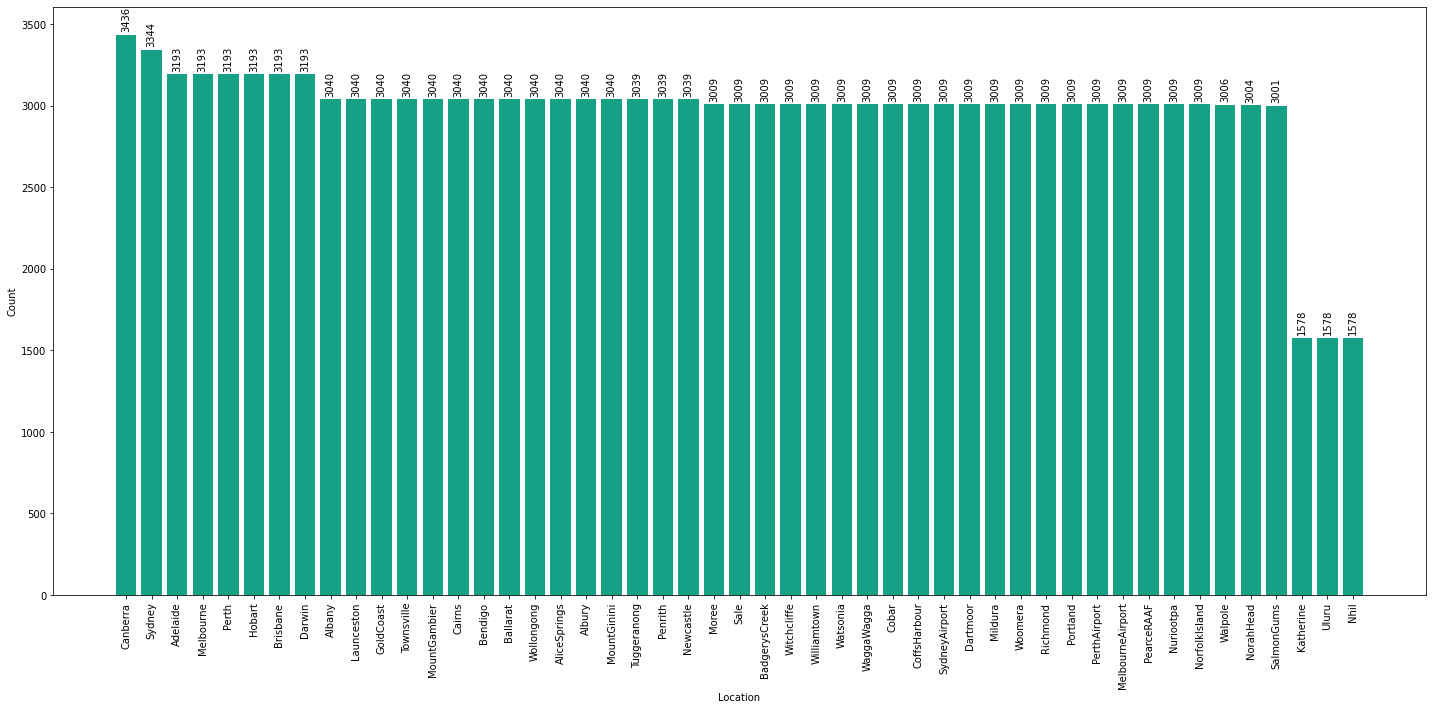

In [98]:
# Group by 'Location' to obtain the counts
Location = data.groupby('Location').size()

# Sort 'Location' from least to greatest
Location = Location.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(20, 10))  # Adjust the figure size if necessary
bars = plt.bar(Location.index, Location.values, color=theme)

# Add numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points of vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 rotation=90)

# Axis labels
plt.xlabel('Location')
plt.ylabel('Count')

# Rotate the x-axis labels if they are long for better visualization
plt.xticks(rotation=90)

# Show the chart
plt.tight_layout()  # Adjust the layout to prevent label cutoff
plt.show()


2.b Frecuencias para RainToday y RainTomorrow

In [82]:
RainToday = data.groupby('RainToday').size()
print(RainToday)

RainTomorrow = data.groupby('RainTomorrow').size()
print(RainTomorrow)

RainToday
No     110319
Yes     31880
dtype: int64
RainTomorrow
No     110316
Yes     31877
dtype: int64


## 3. ver frecuencias porcentuales de valores de atributos categoricos y/o finitos

## 4. agrupar datos respecto a variable independiente ( si llueve mañana ) y ver medidas de centralidad


## Medidas de centralidad para 'RainTomorrow'

### media (promedio)

In [106]:
data.groupby('RainTomorrow').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainTomorrow,,,,,,,,,,,,,,,,
No,11.897675,23.836247,1.270290,5.734807,8.546358,38.288391,13.567314,18.222804,66.217573,46.510625,1018.595599,1016.113587,3.932282,3.921896,17.077001,22.402905
Yes,13.186890,21.119100,6.142104,4.527779,4.471761,45.946764,15.508577,20.078509,77.983314,68.800019,1014.400000,1012.300820,6.099990,6.360065,16.676598,19.197113


####     Media robusta (quitando el 10% de los extremos) en los datos númericos

In [131]:

for name in numericNames: 
    print('Trim mean in ', name, trim_mean(data[name], 0.10))

Trim mean in  MinTemp 12.285219304276088
Trim mean in  MaxTemp 23.112919359274027
Trim mean in  Rainfall 0.7017109514643202
Trim mean in  Evaporation nan
Trim mean in  Sunshine nan
Trim mean in  WindGustSpeed 41.04739275402172
Trim mean in  WindSpeed9am 13.652309913378248
Trim mean in  WindSpeed3pm 18.519189124157844
Trim mean in  Humidity9am 70.46945036436134
Trim mean in  Humidity3pm 52.553236284889316
Trim mean in  Pressure9am nan
Trim mean in  Pressure3pm nan
Trim mean in  Cloud9am nan
Trim mean in  Cloud3pm nan
Trim mean in  Temp9am 17.03754468582428
Trim mean in  Temp3pm 21.773405919153035


### 4.b mediana (dato en la mitad, más fuerte que la media)


In [141]:
data.groupby('RainTomorrow').median()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainTomorrow,,,,,,,,,,,,,,,,
No,11.8,23.3,0.0,5.0,9.4,37.0,13.0,17.0,67.0,47.0,1018.5,1016.0,4.0,4.0,16.9,21.9
Yes,12.7,20.2,0.8,3.8,4.3,44.0,15.0,19.0,80.0,70.0,1014.3,1012.2,7.0,7.0,16.1,18.4


### 4.c moda (el dato que más se repite)

In [150]:
data.groupby('RainTomorrow').agg(lambda x: x.mode().iloc[0])

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
No,2014-03-18,Canberra,11.0,20.0,0.0,4.0,11.0,E,35.0,N,...,13.0,65.0,52.0,1017.9,1015.5,1.0,1.0,16.0,20.0,No
Yes,2010-09-03,Portland,9.6,17.2,0.0,4.0,0.0,W,39.0,N,...,17.0,99.0,69.0,1014.0,1010.4,8.0,8.0,13.8,16.0,No


In [168]:
#Verify the mode 
column = 'Location'
print('Verify mode for group No in column ', column, data.groupby('RainTomorrow').get_group('No')[column].mode())
print('Verify mode for group Yes in column ', column, data.groupby('RainTomorrow').get_group('Yes')[column].mode())


Verify mode for group No in column  Location 0    Canberra
Name: Location, dtype: object
Verify mode for group Yes in column  Location 0    Portland
Name: Location, dtype: object


## 5. Ver cuartiles y percentiles de variables continuas.

El k-esimo percentil de una variable numérica es un valor tal que el k% de las observaciones se encuentran debajo del percentil y el (100 − k) % se encuentran sobre este valor.

En estadística se usan los \textbf{cuantiles} que son equivalentes a los percentiles expresados en fracciones en vez de porcentajes.

### percentiles

In [190]:
# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Columna', 'Percentil', 'Valor'])

# Iterate through the numeric columns
for column in numericNames:
    # Iterate through the values of i%
    for i in np.arange(0, 1.01, 0.01):
        # Calculate the i% percentile
        percentil_value = data[column].quantile(i)
        # Create a temporary DataFrame for the current result
        temp_df = pd.DataFrame({'Columna': [column], 'Percentil': [i], 'Valor': [percentil_value]})
        # Concatenate the temporary DataFrame to the results DataFrame
        results = pd.concat([results, temp_df], ignore_index=True)

# Reorganizar los datos utilizando la función pivot
pivot_table = results.pivot(index='Columna', columns='Percentil', values='Valor')

# Convertir la tabla pivot a una cadena en formato de tabla
formatted_table = pivot_table.to_string()

# Mostrar la tabla formateada
print(formatted_table)



Percentil       0.00    0.01    0.02    0.03    0.04    0.05    0.06    0.07    0.08    0.09    0.10    0.11    0.12    0.13    0.14    0.15    0.16    0.17    0.18    0.19    0.20    0.21    0.22    0.23    0.24    0.25    0.26    0.27    0.28    0.29    0.30    0.31    0.32    0.33    0.34    0.35    0.36    0.37    0.38    0.39    0.40    0.41    0.42    0.43    0.44    0.45    0.46    0.47    0.48    0.49    0.50    0.51    0.52    0.53    0.54    0.55    0.56    0.57    0.58    0.59    0.60    0.61    0.62    0.63    0.64    0.65    0.66    0.67    0.68    0.69    0.70    0.71    0.72    0.73    0.74    0.75    0.76    0.77    0.78    0.79    0.80    0.81    0.82    0.83    0.84    0.85    0.86    0.87    0.88    0.89    0.90    0.91    0.92    0.93    0.94    0.95    0.96    0.97    0.98    0.99    1.00
Columna                                                                                                                                                                            

In [ ]:
# To verify a specific column
for i in np.arange(0, 1.01, 0.01):
    print(i,"%:",data['Pressure3pm'].quantile(i))

### cuartiles

In [191]:
# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Columna', 'Cuartil', 'Valor'])

# Iterate through the numeric columns
for column in numericNames:
    # Iterate through the values of i%
    for i in np.arange(0, 1.25, 0.25):
        # Calculate the i% cuantile
        cuantile_value = data[column].quantile(i)
        # Create a temporary DataFrame for the current result
        temp_df = pd.DataFrame({'Columna': [column], 'Cuartil': [i], 'Valor': [cuantile_value]})
        # Concatenate the temporary DataFrame to the results DataFrame
        results = pd.concat([results, temp_df], ignore_index=True)

# Reorganizar los datos utilizando la función pivot
pivot_table = results.pivot(index='Columna', columns='Cuartil', values='Valor')

# Convertir la tabla pivot a una cadena en formato de tabla
formatted_table = pivot_table.to_string()

# Mostrar la tabla formateada
print(formatted_table)

Cuartil         0.00    0.25    0.50    0.75    1.00
Columna                                             
Cloud3pm         0.0     2.0     5.0     7.0     9.0
Cloud9am         0.0     1.0     5.0     7.0     9.0
Evaporation      0.0     2.6     4.8     7.4   145.0
Humidity3pm      0.0    37.0    52.0    66.0   100.0
Humidity9am      0.0    57.0    70.0    83.0   100.0
MaxTemp         -4.8    17.9    22.6    28.2    48.1
MinTemp         -8.5     7.6    12.0    16.9    33.9
Pressure3pm    977.1  1010.4  1015.2  1020.0  1039.6
Pressure9am    980.5  1012.9  1017.6  1022.4  1041.0
Rainfall         0.0     0.0     0.0     0.8   371.0
Sunshine         0.0     4.8     8.4    10.6    14.5
Temp3pm         -5.4    16.6    21.1    26.4    46.7
Temp9am         -7.2    12.3    16.7    21.6    40.2
WindGustSpeed    6.0    31.0    39.0    48.0   135.0
WindSpeed3pm     0.0    13.0    19.0    24.0    87.0
WindSpeed9am     0.0     7.0    13.0    19.0   130.0


## 6. medidas de dispersión


### 6.a ver el rango de las variables


### 6.b desviación estandar de variables continuas


### 6.c desviación media absoluta de variables continuas

# Estadisticas multivariadas


## 7. ver covarianza de variables continuas ( matriz de covarianzas)

## 8. correlacion lineal o coefiente de correlación de Pearson

In [192]:
data.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


### Análisis

Leyendo los datos de la tabla, podemos observar que:

**Variables que se correlacionan positivamente:**

*   MaxTemp y Temp3pm: 0.984503
*   Pressure9am y Pressure3pm: 0.961326
*   MinTemp y Temp9am: 0.901821
*   MaxTemp y Temp9am: 0.887210
*   Temp9am y Temp3pm: 0.860591
*   MinTemp y MaxTemp: 0.736555
*   MinTemp y Temp3pm: 0.708906
*   WindGustSpeed y WindSpeed3pm: 0.686307
*   Humidity9am y Humidity3pm: 0.666949
*   WindGustSpeed y WindSpeed9am: 0.605303
*   Cloud9am y Cloud3pm: 0.603564
*   MaxTemp y Evaporation: 0.587932
*   Evaporation y Temp3pm: 0.572893
*   Evaporation y Temp9am: 0.545115
*   WindSpeed9am y WindSpeed3pm: 0.519547
*   MaxTemp y Sunshine: 0.470156
*   MinTemp y Evaporation: 0.466993
*   Evaporation y Sunshine: 0.365602
*   Rainfall y Humidity3pm: 0.255755
*   MinTemp y WindGustSpeed: 0.177415
*   MinTemp y WindSpeed3pm: 0.175173
*   MinTemp y WindSpeed9am: 0.175064
*   WindSpeed3pm y Temp9am: 0.163030
*   WindGustSpeed y Temp9am: 0.150150
*   Rainfall y WindGustSpeed: 0.133659
*   WindSpeed9am y Temp9am: 0.128545
*   Rainfall y WindSpeed9am: 0.087338
*   MinTemp y Cloud9am: 0.078754
*   Rainfall y WindSpeed3pm: 0.057887
*   Sunshine y WindSpeed3pm: 0.053834
*   MinTemp y Cloud3pm: 0.021605


**Variables que se correlacionan negativamente:**

*   Sunshine y Pressure3pm: -0.019719
*   Humidity9am y Pressure3pm: -0.027544
*   Pressure9am y Cloud3pm: -0.060772
*   Rainfall y Evaporation: -0.064351
*   MaxTemp y Rainfall: -0.074992
*   Pressure3pm y Cloud3pm: -0.084778
*   Rainfall y Pressure3pm: -0.126534
*   Temp3pm y Cloud9am: -0.126659
*   Pressure9am y Cloud9am: -0.129796
*   Temp9am y Cloud9am: -0.136959
*   WindSpeed3pm y Humidity9am: -0.145525
*   Pressure3pm y Cloud9am: -0.147861
*   Rainfall y Pressure9am: -0.168154
*   WindSpeed9am y Pressure3pm: -0.175817
*   Evaporation y Cloud3pm: -0.182618
*   Evaporation y Cloud9am: -0.183793
*   WindGustSpeed y Humidity9am: -0.215070
*   Temp3pm y Humidity9am: -0.221019
*   Rainfall y Sunshine: -0.227549
*   WindSpeed9am y Pressure9am: -0.228743
*   MinTemp y Humidity9am: -0.232899
*   WindSpeed3pm y Pressure3pm: -0.255439
*   Evaporation y Pressure9am: -0.270362
*   WindSpeed9am y Humidity9am: -0.270858
*   Temp3pm y Pressure9am: -0.286770
*   Evaporation y Pressure3pm: -0.293581
*   WindSpeed3pm y Pressure9am: -0.296351
*   Temp9am y Cloud3pm: -0.302060
*   Temp3pm y Cloud3pm: -0.317420
*   MaxTemp y Pressure9am: -0.332061
*   Temp3pm y Pressure3pm: -0.389548
*   Evaporation y Humidity3pm: -0.390243
*   WindGustSpeed y Pressure3pm: -0.413749
*   Temp9am y Pressure9am: -0.422556
*   MaxTemp y Pressure3pm: -0.427167
*   MinTemp y Pressure9am: -0.450970
*   WindGustSpeed y Pressure9am: -0.458744
*   MinTemp y Pressure3pm: -0.461292
*   Temp9am y Pressure3pm: -0.470187
*   Temp9am y Humidity9am: -0.471354
*   Sunshine y Humidity9am: -0.490819
*   Temp9am y Humidity3pm: -0.498399
*   Evaporation y Humidity9am: -0.504092
*   MaxTemp y Humidity9am: -0.504110
*   MaxTemp y Humidity3pm: -0.508855
*   Temp3pm y Humidity3pm: -0.557841
*   Sunshine y Humidity3pm: -0.629130
*   Cloud3pm y Sunshine: -0.703930



**Temperatura (MinTemp, MaxTemp, Temp9am, Temp3pm):** Hay fuertes correlaciones positivas entre estas variables. Por ejemplo, la temperatura mínima (MinTemp) está altamente correlacionada con la temperatura máxima (MaxTemp), la temperatura a las 9 a.m. (Temp9am) y la temperatura a las 3 p.m. (Temp3pm). Esto es de esperar, ya que estas variables están relacionadas directamente con la temperatura.

**Humedad (Humidity9am, Humidity3pm):** La humedad a las 9 a.m. y a las 3 p.m. también muestra una correlación positiva significativa entre sí. Esto sugiere que la humedad tiende a mantenerse relativamente consistente durante el día.

**Presión (Pressure9am, Pressure3pm):** La presión a las 9 a.m. y a las 3 p.m. también está altamente correlacionada. Esto sugiere que la presión atmosférica tiende a mantenerse constante durante el día.

**Viento (WindGustSpeed, WindSpeed9am, WindSpeed3pm):** Las velocidades del viento a diferentes momentos del día están moderadamente correlacionadas entre sí, lo que indica una cierta consistencia en las condiciones del viento a lo largo del día.

**Lluvia (Rainfall):** La cantidad de lluvia no muestra fuertes correlaciones con otras variables, lo que puede ser esperado, ya que la lluvia es un evento climático relativamente independiente de otras condiciones.

**Nubosidad (Cloud9am, Cloud3pm):** La nubosidad a las 9 a.m. y a las 3 p.m. está correlacionada positivamente, pero no de manera muy fuerte. Esto sugiere cierta consistencia en las condiciones de nubosidad, pero con variabilidad.

**Brillo solar (Sunshine):** El brillo solar muestra una correlación negativa significativa con la humedad y la nubosidad a las 9 a.m. y a las 3 p.m. Esto indica que días más soleados tienden a tener menos nubosidad y humedad.

# Gráficos

## 9. hacer histogramas de las variables, pueden ser todas, o tal vez las mas relevantes.

## 10. hacer graficos de estimacion de densidad

# 11. Diagramas de caja

## 12. Diagramas de dispersión

## 13. Coordenadas Paralelas

# 14. Diagramas de estrella

## 15. Caras de Chernoff